Connected to Python 3.10.0

In [1]:
import cv2
import time
from IPython.display import display, clear_output
import PIL.Image

In [3]:
video_path = 'PendulumVideos/SwingingPendulum.mp4'  
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error opening video file")
    exit()

In [4]:
threshold_value = 50
min_contour_area = 100

In [5]:
pendulum_motion = False
start_time = None
end_time = None
swing_started = False

Time for a single swing: 0.002103567123413086 seconds


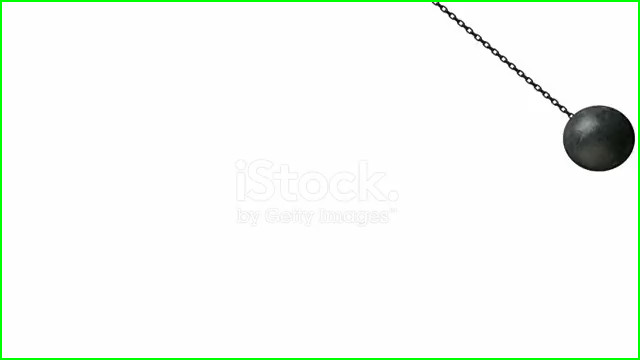

In [6]:
while True:
    ret, frame = cap.read()
    if not ret:
        break
    # Convert frame to grayscale and blur it
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Perform thresholding
    _, thresh = cv2.threshold(blurred, threshold_value, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        # Filter contours by area
        if cv2.contourArea(contour) > min_contour_area:
            pendulum_motion = True
            if start_time is None:
                start_time = time.time()
            cv2.drawContours(frame, [contour], -1, (0, 255, 0), 2)
            # Track extreme points for a single swing
            if not swing_started:
                swing_started = True
                swing_start_time = time.time()
    # If pendulum motion stopped, reset swing tracking
    if not pendulum_motion:
        swing_started = False
    cv2.imshow('Motion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    # Calculate time for a single swing
    if pendulum_motion and swing_started:
        end_time = time.time()
        swing_duration = end_time - swing_start_time
        print(f"Time for a single swing: {swing_duration} seconds")
        swing_started = False  # Reset swing tracking
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = PIL.Image.fromarray(frame_rgb)
    display(img)
    clear_output(wait=True)
    pendulum_motion = False  # Reset pendulum motion flag

In [7]:
if start_time is not None and end_time is not None:
    total_duration = end_time - start_time
    print(f"Total pendulum motion duration: {total_duration} seconds")
else:
    print("No pendulum motion detected in the video.")

Total pendulum motion duration: 3.3475608825683594 seconds


In [8]:
cap.release()
cv2.destroyAllWindows()